In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

from manoFunkcijos import pout

In [2]:
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
    host = '88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
    )
C=DB.cursor()

In [3]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""SELECT
lytis, GROUP_CONCAT(bdu_spalio) AS GC
FROM DUS2014N 
GROUP BY lytis;"""
C.execute(sql)
ans = C.fetchall()
lytis, bdusp = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

| 0 |      F       |6,6,6,13.33,10|
| 1 |      M       |6,11.33,6,6,6.|


In [5]:
len(bdusp)

2

In [6]:
#  numpy fromstring
bduspII = []
for i in bdusp:
    skaiciai = np.fromstring(i, sep=',')
    bduspII.append(skaiciai)
print(bduspII)

[array([   6.,    6.,    6., ..., 3670., 4212., 4218.]), array([   6.  ,   11.33,    6.  , ..., 3246.  , 3819.67, 2324.  ])]


In [7]:
txt = '3.25,4.25,7.11,10'
s = np.fromstring(txt, sep=',')
print(s)

[ 3.25  4.25  7.11 10.  ]


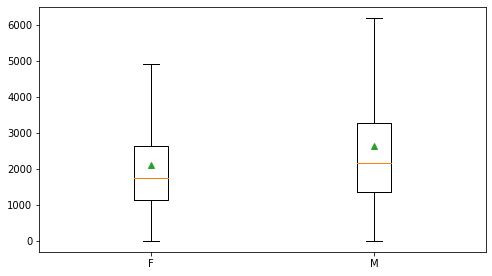

In [12]:
# boxplot:
fig, axis = plt.subplots(figsize=[8,4.5])

axis.boxplot(bduspII, showmeans=True, showfliers=False)

axis.set_xticklabels(lytis)

plt.show()

In [ ]:
# parodykite su boxplot atlyginimų pasiskirstymus nuo amžiaus grupės 2018 metams (vyrams ir moterims atskirai).
# Taip pat parodykite su boxplot'ais atlyginimų pasiskirstymus nuo išsilavinimo, 2018 metams (visiems respondentams)

In [17]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""SELECT 
amzius, GROUP_CONCAT(bdu_spalio)
FROM DUS2018N 
WHERE lytis = 'F'
GROUP BY amzius ORDER BY amzius asc"""
C.execute(sql)
ans = C.fetchall()
edu, bduf = list(map(list, zip(*ans)))
#? = np.transpose(ans)

for k, i in enumerate(bduf):
    bduf[k] = np.fromstring(i, sep=',')

#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""SELECT 
amzius, GROUP_CONCAT(bdu_spalio)
FROM DUS2018N 
WHERE lytis = 'M'
GROUP BY amzius ORDER BY amzius asc"""
C.execute(sql)
ans = C.fetchall()
edu, bdum = list(map(list, zip(*ans)))
#? = np.transpose(ans)
for k, i in enumerate(bdum):
    bdum[k] = np.fromstring(i, sep=',')

In [19]:
plt.style.use(style='default')
#print(plt.style.available)
#bmh, classic, default, fivethirtyeight, ggplot ...
plt.style.use(style='ggplot')

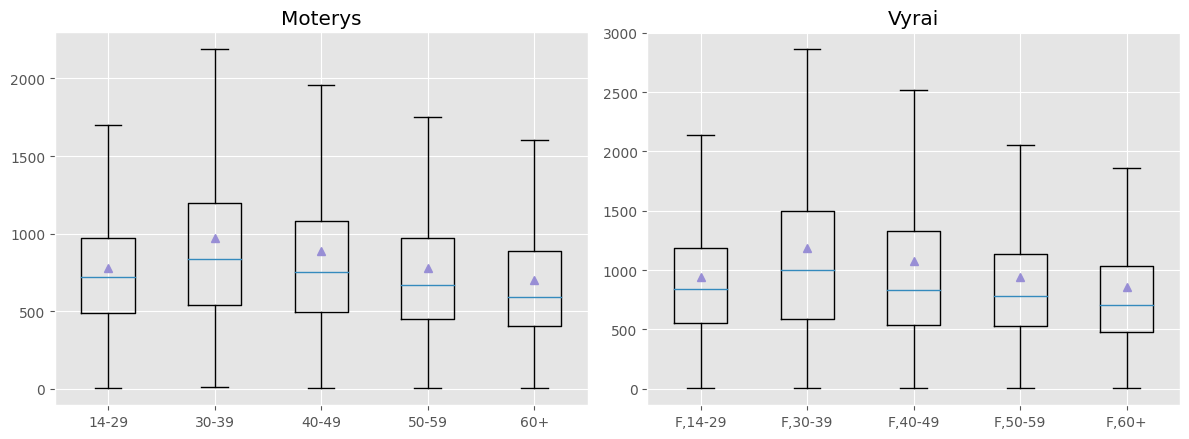

In [28]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4.5), gridspec_kw={'width_ratios':[1,1]})
#ax1:
#plotting code:
ax1.boxplot(bduf, showmeans=True, showfliers=False)
ax1.set_xticklabels(edu)
ax1.set_title('Moterys')
#ax1.legend(loc=1)
#ax2:
#plotting code:
ax2.boxplot(bdum, showmeans=True, showfliers=False)
ax2.set_xticklabels(list(map(lambda x : 'F,'+x, edu)))
ax2.set_title('Vyrai')

#ax2.legend(loc='best')
fig.tight_layout()
plt.show()


| 0 |     BMW      |     365      |19500,16190,28|
| 1 |  Volkswagen  |     310      |16490,6500,730|
| 2 |     Audi     |     227      |1200,5500,7100|
| 3 |Mercedes-Benz |     177      |42500,7500,289|
| 4 |    Toyota    |     154      |11900,4250,435|


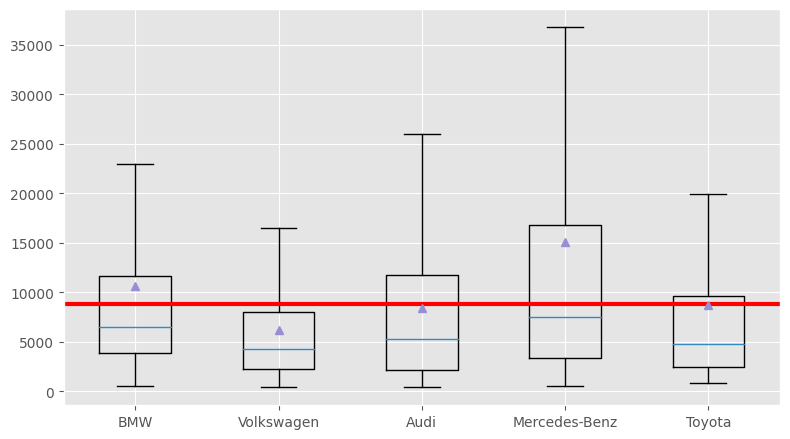

In [26]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""SELECT gamintojas, count(*) AS C,
GROUP_CONCAT(cast(replace(price, ' ', '') as float)) AS GC
FROM autopliuslt 
GROUP BY gamintojas 
ORDER BY C DESC 
LIMIT 5;"""
C.execute(sql)
ans = C.fetchall()
g, c, gc = list(map(list, zip(*ans)))
#? = np.transpose(ans)
for k, i in enumerate(gc):
    gc[k] = np.fromstring(i, sep=',')

pout(ans)

#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""select avg(cast(replace(price, ' ', '') as float)) from autopliuslt"""
C.execute(sql)
ans = C.fetchall()
vid = ans[0][0]

fig, axis = plt.subplots(figsize=(8,4.5))
#plotting code:
axis.boxplot(gc, showmeans=True, showfliers=False)
axis.set_xticklabels(g)
axis.axhline(y=vid, color='red', linewidth=3)
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [33]:
l = ['f', 'm']
g = ['14', '15']
lg = []
for li, gi in zip(l, g):
    lg.append(li+gi)
print(lg)

['f14', 'm15']


#### Paskaitos metu pateiktos užduotys:

In [ ]:
# 1) parodykite su boxplot atlyginimų pasiskirstymus nuo amžiaus 
# grupės 2018 metams (vyrams ir moterims atskirai).
# 2) Taip pat parodykite su boxplot'ais atlyginimų pasiskirstymus nuo išsilavinimo, 
# 2018 metams (visiems respondentams)

In [ ]:
# 3) Pateikite su boxplot'u  skelbimų kainų pasiskirtymą top 5 automobilių gamintojams.
# 3) papildymas: suraskite vidutinę kainą visų automobilių ir atvaizduokite brūkšnį ties ta kaina su 
# komanda axis.axhline(y=JŪSŲ RASTAS SKAIČIUS)

In [ ]:
# -- pateikite su bar arba barh vidutines automobilių kainas
# -- top 5 gamintojams, dviem variantais:
# -- a) laikote, kad visi skelbimai yra unikalūs
# -- b) eliminuojate pasikartojančius skelbimus (jei skelbimo id kartojasi DB įrašuose
# -- tai skelbimas nėra unikalus, jis dubliuojasi)

In [ ]:
# atvaizduokite boxplotais kainos pasiskirstymą nuo ridos (15 000 km intervalais apvalintos)

In [ ]:
# atvaziduokite boxplotu ridos pasiskirstymą nuo kuro rūšies/tipo

In [ ]:
# atvaizduokite boxplotais ridos pasiskirstymo priklausomybę nuo gamintojo

In [ ]:
# suraskite visus gamintojus, kurių  modelių vidutinė kaina yra didesnė už vidutinę
# visų automobilių
# kainą.
# Iš jų atrinkite 5-kis brangiausius gamintojus, ir suraskite jų 
# parduodamų modelių vidutinį amžių.
# taip pat atvaizduokite su boxplot'ais šių 5-kių gamintojų parduodamų modelių kainų pasiskirstymą.